In [78]:
from littlefish.visulization import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [79]:
simulation_folder = r"F:\little_fish_simulation_logs_8eyes_no_hidden"
min_generation = 90
max_generation = 98

population_size = 1000
turnover_rate = 0.6

mother_fish_num = int(population_size * (1 - turnover_rate))

In [80]:
life_span_df = plotting.collect_life_spans(
    simulation_folder,
    min_generation=min_generation,  # 0
    max_generation=max_generation,  # 25
)

reading generation_0000090, 1 / 9 ...
reading generation_0000091, 2 / 9 ...
reading generation_0000092, 3 / 9 ...
reading generation_0000093, 4 / 9 ...
reading generation_0000094, 5 / 9 ...
reading generation_0000095, 6 / 9 ...
reading generation_0000096, 7 / 9 ...
reading generation_0000097, 8 / 9 ...
reading generation_0000098, 9 / 9 ...


In [81]:
life_span_df.sort_values(by="median_life_span")

,generation,fish_name,mean_life_span,median_life_span,is_from_last_geneartion
7892,97,fish_241219_21_07_58.427768,261.2,4.5,False
8924,98,fish_241219_21_28_12.033261,30.0,5.0,False
7823,97,fish_241219_21_07_54.964245,23.3,5.5,False
7876,97,fish_241219_21_07_57.625735,94.0,5.5,False
8858,98,fish_241219_21_28_08.779907,17.4,5.5,False
...,...,...,...,...,...
8010,98,fish_241219_20_47_09.906164,3662.6,2934.5,True
0,90,fish_241219_17_15_58.576170,4134.1,3383.5,True
163,90,fish_241219_18_37_55.846066,2878.0,3455.5,False
762,90,fish_241219_18_38_17.997177,3172.4,3669.5,False


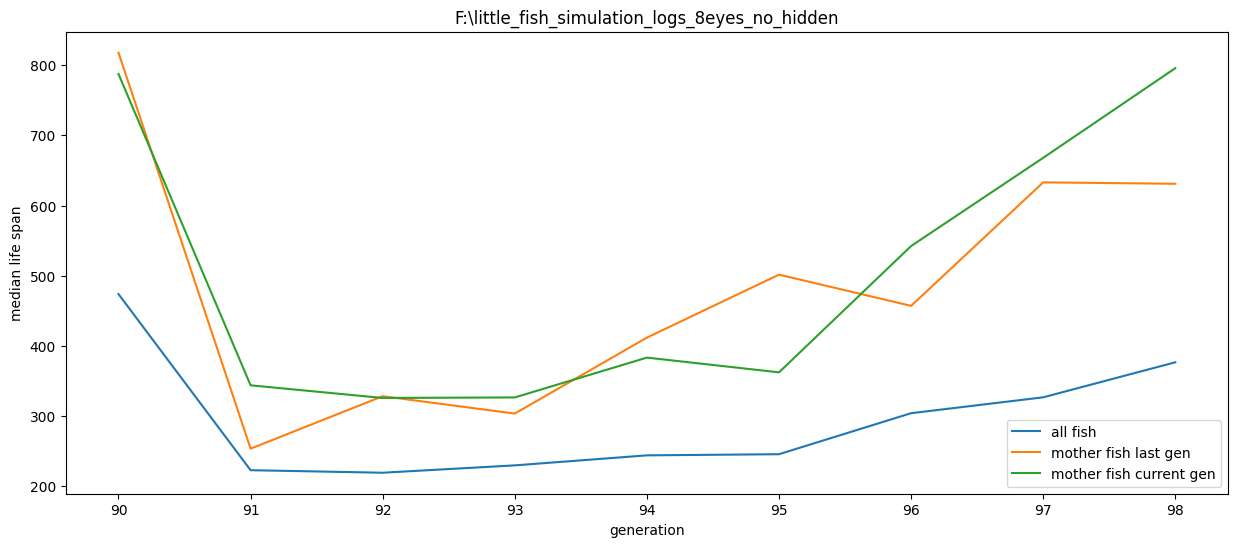

In [82]:
gens = sorted(life_span_df["generation"].unique())
median_life_span = []
median_mo_life_last_gen = []
median_mo_life_curr_gen = []
for gen in gens:
    curr_life_span = sorted(life_span_df.query("generation == @gen")["median_life_span"])
    median_life_span.append(np.mean(curr_life_span))
    median_mo_life_last_gen.append(np.median(life_span_df.query("generation == @gen and is_from_last_geneartion")["median_life_span"]))
    median_mo_life_curr_gen.append(np.median(curr_life_span[-mother_fish_num:]))

f, ax = plt.subplots(figsize=(15, 6))
ax.plot(gens, median_life_span, label="all fish")
ax.plot(gens, median_mo_life_last_gen, label="mother fish last gen")
ax.plot(gens, median_mo_life_curr_gen, label="mother fish current gen")
ax.set_xlabel("generation")
ax.set_ylabel("median life span")
ax.set_title(simulation_folder)
ax.legend()

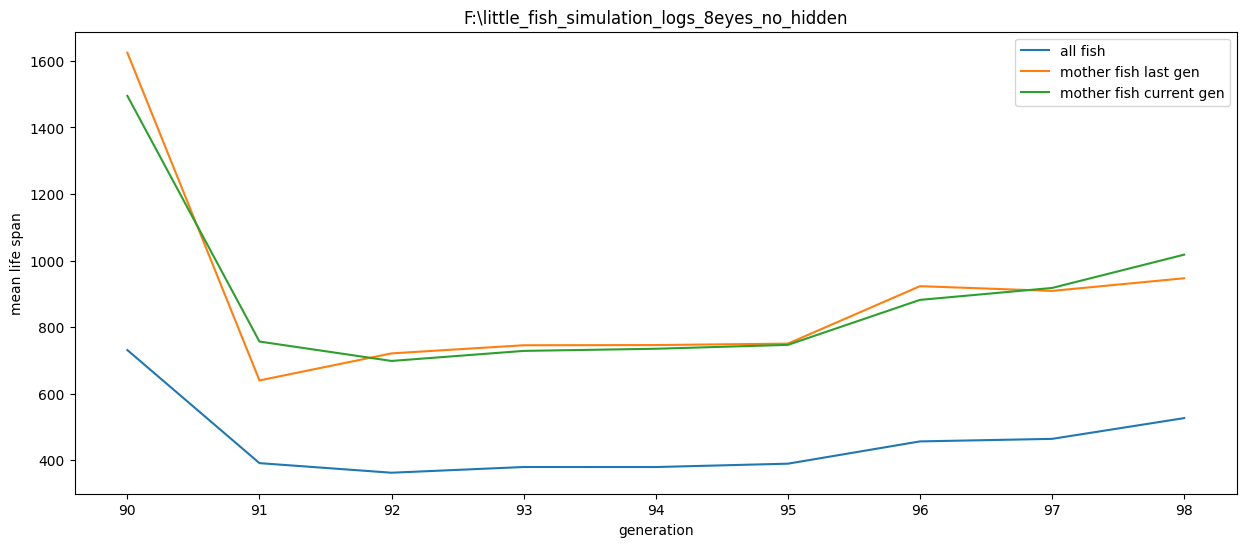

In [83]:
gens = sorted(life_span_df["generation"].unique())
mean_life_span = []
mean_mo_life_last_gen = []
mean_mo_life_curr_gen = []
for gen in gens:
    curr_life_span = sorted(life_span_df.query("generation == @gen")["mean_life_span"])
    mean_life_span.append(np.mean(curr_life_span))
    mean_mo_life_last_gen.append(np.mean(life_span_df.query("generation == @gen and is_from_last_geneartion")["mean_life_span"]))
    mean_mo_life_curr_gen.append(np.mean(curr_life_span[-mother_fish_num:]))

f, ax = plt.subplots(figsize=(15, 6))
ax.plot(gens, mean_life_span, label="all fish")
ax.plot(gens, mean_mo_life_last_gen, label="mother fish last gen")
ax.plot(gens, mean_mo_life_curr_gen, label="mother fish current gen")
ax.set_xlabel("generation")
ax.set_ylabel("mean life span")
ax.set_title(simulation_folder)
ax.legend()

(0.0, 6000.0)

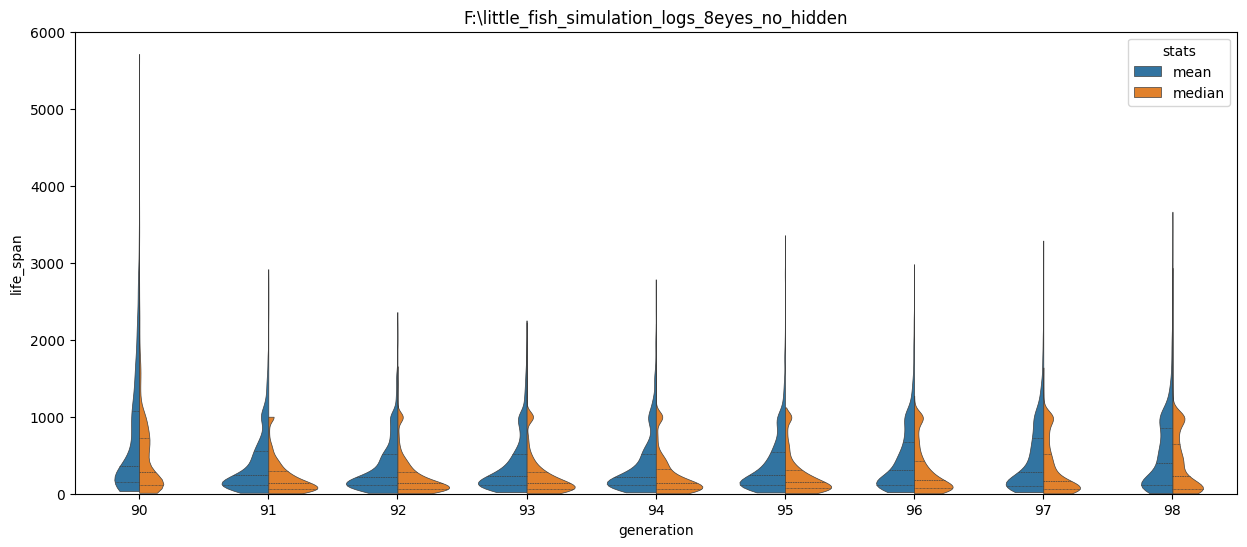

In [84]:
mean_df = life_span_df[["generation", "fish_name", "mean_life_span", "is_from_last_geneartion"]]
mean_df["stats"] = "mean"
mean_df.rename(columns={"mean_life_span": "life_span"}, inplace=True)

median_df = life_span_df[["generation", "fish_name", "median_life_span", "is_from_last_geneartion"]]
median_df["stats"] = "median"
median_df.rename(columns={"median_life_span": "life_span"}, inplace=True)

plot_df = pd.concat([mean_df, median_df]).reset_index(drop=True)

# print(plot_df)

f, ax = plt.subplots(figsize=(15, 6))
ax.set_title(simulation_folder)
sns.violinplot(
    data=plot_df, x="generation", y="life_span", hue="stats", split=True, ax=ax, cut=0, linewidth=0.5, inner="quart"
)
ax.set_ylim([0, 6000])